Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [2]:
file = pd.ExcelFile("../../data/final/Handball_09.03.2023_fertig.xlsx")

file.sheet_names

df = file.parse('3. League')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-2]
df.columns


Index(['Home team', 'Guest team', 'Matchday', 'Player 3rd league',
       'Shooter team', 'club region', 'Game Minute',
       'Difference between\nfinal whistle and kickoff \n(in seconds)',
       'Home Goal', 'Guest Goal',
       'Goalkeeper position\n(0 = on the line;\n 1 = in front of the line)',
       'Toss successful?\n(0 = no; 1 = yes;\n 2 = yes, afterthrow',
       'Left/right \nhanded?\n(1 = right; 2 = left)', 'Throw direction',
       'Pressure situation?\n(0 = no; \n1= Goalkeeper change;\n2 = last 7 meter held; 3 = goal difference < 4 + from 50. minute; 4 = 1+2; 5 = 1+3; 6 = 2+3; 7 = 1+2+3; 8 = last 7 meter successful in follow-up throw\n',
       'Number of seven meters\n(of the player)',
       'Throw quadrant last 7 meter',
       'last 7 meter successful?\n(0 = no; 1 = yes; \n2 = yes, in the afterthrow'],
      dtype='object')

Cleanup & Renaming

In [3]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
df.replace('-', np.nan,inplace=True)
df.replace(-99, np.nan,inplace=True)
df.replace('-99', np.nan,inplace=True)
df.replace('?', np.nan,inplace=True)
df.replace('?!', np.nan,inplace=True)
#df.dropna(inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','team','region','playTime',
              'whistleThrowTime','homeGoals','opponentGoals',
              'goalKeeperPosition',
              'throwSuccess','LRHandy','throwDirection',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','team':'string','region':'string','playTime':'float16',
              'whistleThrowTime':'float16','homeGoals':'float16','opponentGoals':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16', })

df['homeTeam']=df['homeTeam'].str.rstrip()
df['opponentTeam']=df['opponentTeam'].str.rstrip()
df['team']=df['team'].str.rstrip()
df['oTeam'] = [ot if str(ht) == str(t) else ht for ht,ot,t in zip(df['homeTeam'],df['opponentTeam'],df['team'])]
df['oTeam'] = df['oTeam'].astype('string')
df

,homeTeam,opponentTeam,day,name,team,region,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess,oTeam
0,TV Emsdetten,ASV Hamm-Westfalen II,1.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TV Emsdetten
1,HLZ Ahlener SG,TV Emsdetten,2.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HLZ Ahlener SG
2,TV Emsdetten,VfL Gladbeck,3.0,HRS,TV Emsdetten,west,2.0,23.0,0.0,0.0,1.0,1.0,1.0,8.0,0.0,1.0,NaN,1.0,VfL Gladbeck
3,TV Emsdetten,VfL Gladbeck,3.0,HRS,TV Emsdetten,west,7.0,16.0,5.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,8.0,1.0,VfL Gladbeck
4,TV Emsdetten,VfL Gladbeck,3.0,HRS,TV Emsdetten,west,31.0,28.0,19.0,9.0,1.0,1.0,1.0,7.0,0.0,3.0,3.0,1.0,VfL Gladbeck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,Stralsunder HV,DHK Flensborg,19.0,SKL,Stralsunder HV,north,6.0,23.0,3.0,2.0,1.0,1.0,1.0,4.0,0.0,1.0,NaN,NaN,DHK Flensborg
1015,Stralsunder HV,DHK Flensborg,19.0,SKL,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,4.0,1.0,DHK Flensborg
1016,Stralsunder HV,DHK Flensborg,19.0,SKL,Stralsunder HV,north,49.0,36.0,28.0,22.0,1.0,0.0,1.0,3.0,0.0,3.0,3.0,1.0,DHK Flensborg
1017,Stralsunder HV,DHK Flensborg,19.0,SKL,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,4.0,1.0,DHK Flensborg


Data Prep

In [4]:
# Dropped less data : 'homeTeam','opponentTeam', 'throwQuadrantLastThrow','lastThrowSuccess', 

feat = df.loc[:,('day','name','team','region','playTime',
              'whistleThrowTime','homeGoals','opponentGoals',
              'goalKeeperPosition',
              'throwSuccess','LRHandy','throwDirection',
              'pressureSituation','noOfThrowsFromPlayer','oTeam'
              )].copy()

feat

,day,name,team,region,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,oTeam
0,1.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TV Emsdetten
1,2.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HLZ Ahlener SG
2,3.0,HRS,TV Emsdetten,west,2.0,23.0,0.0,0.0,1.0,1.0,1.0,8.0,0.0,1.0,VfL Gladbeck
3,3.0,HRS,TV Emsdetten,west,7.0,16.0,5.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,VfL Gladbeck
4,3.0,HRS,TV Emsdetten,west,31.0,28.0,19.0,9.0,1.0,1.0,1.0,7.0,0.0,3.0,VfL Gladbeck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,19.0,SKL,Stralsunder HV,north,6.0,23.0,3.0,2.0,1.0,1.0,1.0,4.0,0.0,1.0,DHK Flensborg
1015,19.0,SKL,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,DHK Flensborg
1016,19.0,SKL,Stralsunder HV,north,49.0,36.0,28.0,22.0,1.0,0.0,1.0,3.0,0.0,3.0,DHK Flensborg
1017,19.0,SKL,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,DHK Flensborg


WhistleTime

Median:  [30.0]
Mean:  [32.9]
Minimum:  [11.0]
Maximum:  [55.0]
Q1:  [23.0]
Q3:  [36.0]
Fliers:  [[  3.  57.  58.  58.  58.  59.  60.  60.  61.  61.  61.  63.  65.  66.
   66.  66.  66.  67.  67.  68.  70.  72.  76.  80.  81.  83.  84.  93.
   93.  96.  99. 112. 114. 117. 128. 131. 143. 177.]]


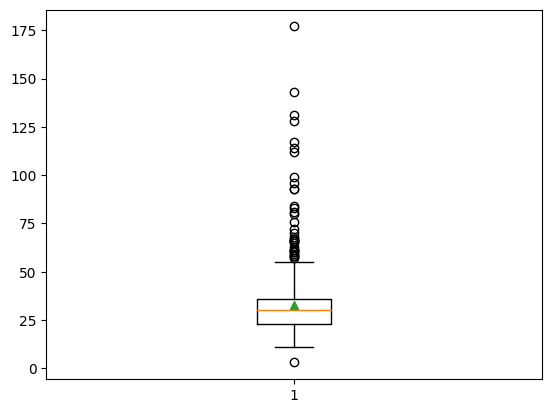

In [5]:
dfwt = feat.loc[:,('whistleThrowTime')].copy()
dfwt.dropna(inplace=True)
bp = plt.boxplot(dfwt, showmeans=True)

medians = [round(item.get_ydata()[0], 1) for item in bp['medians']]
print('Median: ',medians)
means = [round(item.get_ydata()[0], 1) for item in bp['means']]
print('Mean: ',means)
minimums = [round(item.get_ydata()[0], 1) for item in bp['caps']][::2]
print('Minimum: ',minimums)
maximums = [round(item.get_ydata()[0], 1) for item in bp['caps']][1::2]
print('Maximum: ',maximums)
q1 = [round(min(item.get_ydata()), 1) for item in bp['boxes']]
print('Q1: ',q1)
q3 = [round(max(item.get_ydata()), 1) for item in bp['boxes']]
print('Q3: ',q3)
fliers = [item.get_ydata() for item in bp['fliers']]
print('Fliers: ',np.sort(fliers))

Update missing Whistle Time Column

In [6]:
#feat['whistleThrowTime'].replace( np.nan,30,inplace=True)
#feat['whistleThrowTime']

## Replaye Nan for whistleThrowTime with 0 and add it relavancy column ad binary
feat['whistleThrowTime'].replace( np.nan,0,inplace=True)
feat['whistleThrowTimeRelevant'] = [0 if time == 0 else 1 for time in feat['whistleThrowTime']]
feat

,day,name,team,region,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,oTeam,whistleThrowTimeRelevant
0,1.0,<NA>,<NA>,west,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TV Emsdetten,0
1,2.0,<NA>,<NA>,west,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HLZ Ahlener SG,0
2,3.0,HRS,TV Emsdetten,west,2.0,23.0,0.0,0.0,1.0,1.0,1.0,8.0,0.0,1.0,VfL Gladbeck,1
3,3.0,HRS,TV Emsdetten,west,7.0,16.0,5.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,VfL Gladbeck,1
4,3.0,HRS,TV Emsdetten,west,31.0,28.0,19.0,9.0,1.0,1.0,1.0,7.0,0.0,3.0,VfL Gladbeck,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,19.0,SKL,Stralsunder HV,north,6.0,23.0,3.0,2.0,1.0,1.0,1.0,4.0,0.0,1.0,DHK Flensborg,1
1015,19.0,SKL,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,DHK Flensborg,1
1016,19.0,SKL,Stralsunder HV,north,49.0,36.0,28.0,22.0,1.0,0.0,1.0,3.0,0.0,3.0,DHK Flensborg,1
1017,19.0,SKL,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,DHK Flensborg,1


Remove Null

In [7]:
feat.dropna(inplace=True)
feat.info()
feat

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 2 to 1018
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   day                       629 non-null    float16
 1   name                      629 non-null    string 
 2   team                      629 non-null    string 
 3   region                    629 non-null    string 
 4   playTime                  629 non-null    float16
 5   whistleThrowTime          629 non-null    float16
 6   homeGoals                 629 non-null    float16
 7   opponentGoals             629 non-null    float16
 8   goalKeeperPosition        629 non-null    float16
 9   throwSuccess              629 non-null    float16
 10  LRHandy                   629 non-null    float16
 11  throwDirection            629 non-null    float16
 12  pressureSituation         629 non-null    float16
 13  noOfThrowsFromPlayer      629 non-null    float16
 14  oTeam    

,day,name,team,region,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,oTeam,whistleThrowTimeRelevant
2,3.0,HRS,TV Emsdetten,west,2.0,23.0,0.0,0.0,1.0,1.0,1.0,8.0,0.0,1.0,VfL Gladbeck,1
3,3.0,HRS,TV Emsdetten,west,7.0,16.0,5.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,VfL Gladbeck,1
4,3.0,HRS,TV Emsdetten,west,31.0,28.0,19.0,9.0,1.0,1.0,1.0,7.0,0.0,3.0,VfL Gladbeck,1
5,3.0,HRS,TV Emsdetten,west,51.0,22.0,31.0,20.0,1.0,1.0,1.0,1.0,0.0,4.0,VfL Gladbeck,1
6,3.0,HRS,TV Emsdetten,west,54.0,31.0,35.0,22.0,1.0,1.0,1.0,3.0,0.0,5.0,VfL Gladbeck,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,19.0,SKL,Stralsunder HV,north,6.0,23.0,3.0,2.0,1.0,1.0,1.0,4.0,0.0,1.0,DHK Flensborg,1
1015,19.0,SKL,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,DHK Flensborg,1
1016,19.0,SKL,Stralsunder HV,north,49.0,36.0,28.0,22.0,1.0,0.0,1.0,3.0,0.0,3.0,DHK Flensborg,1
1017,19.0,SKL,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,DHK Flensborg,1


Final Data Selection

In [8]:
# Excat info may be learned : 'day','team','region','playTime','oTeam',
# Future: 'throwSuccess',
# not much significant: 'LRHandy','noOfThrowsFromPlayer'
# included in pressure situation : 'homeGoals','opponentGoals'

feat = feat.loc[:,('name','whistleThrowTime','whistleThrowTimeRelevant','goalKeeperPosition','pressureSituation','throwDirection')]



feat

,name,whistleThrowTime,whistleThrowTimeRelevant,goalKeeperPosition,pressureSituation,throwDirection
2,HRS,23.0,1,1.0,0.0,8.0
3,HRS,16.0,1,1.0,0.0,3.0
4,HRS,28.0,1,1.0,0.0,7.0
5,HRS,22.0,1,1.0,0.0,1.0
6,HRS,31.0,1,1.0,0.0,3.0
...,...,...,...,...,...,...
1014,SKL,23.0,1,1.0,0.0,4.0
1015,SKL,20.0,1,1.0,0.0,3.0
1016,SKL,36.0,1,1.0,0.0,3.0
1017,SKL,20.0,1,1.0,0.0,3.0


Encoding Data

In [9]:
# encode the Categorical Variable Ordinal
from sklearn.preprocessing import LabelEncoder 
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [10]:
#feat_cols = feat.select_dtypes(include=["string"]).columns
#float_cols = feat.select_dtypes(include=["float16"]).columns
#feat = MultiColumnLabelEncoder(columns = feat_cols).fit_transform(feat)
#feat = feat.astype('int32')
#feat.info()
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#feat

In [11]:
feat = pd.get_dummies(feat, columns=['name','pressureSituation'], drop_first=False)
feat.head()

,whistleThrowTime,whistleThrowTimeRelevant,goalKeeperPosition,throwDirection,name_BCT,name_BERD,name_BHD,name_BRB,name_BRN,name_CDS,...,name_zGT,pressureSituation_0.0,pressureSituation_1.0,pressureSituation_2.0,pressureSituation_3.0,pressureSituation_4.0,pressureSituation_5.0,pressureSituation_6.0,pressureSituation_7.0,pressureSituation_8.0
2,23.0,1,1.0,8.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,16.0,1,1.0,3.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,28.0,1,1.0,7.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,22.0,1,1.0,1.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,31.0,1,1.0,3.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Input & Output Data

In [12]:


X = feat.loc[:, feat.columns != 'throwDirection']

y = feat['throwDirection']

y


2       8.0
3       3.0
4       7.0
5       1.0
6       3.0
       ... 
1014    4.0
1015    3.0
1016    3.0
1017    3.0
1018    3.0
Name: throwDirection, Length: 629, dtype: float16

Mutual Information Score

In [13]:
""" from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(X,y)
print(mi_score)
feature_MI_score = pd.Series(mi_score,index=X.columns)
feature_MI_score.sort_values(ascending=False) """

' from sklearn.feature_selection import mutual_info_classif as MIC\nmi_score = MIC(X,y)\nprint(mi_score)\nfeature_MI_score = pd.Series(mi_score,index=X.columns)\nfeature_MI_score.sort_values(ascending=False) '

Train Test Split

In [14]:
from sklearn.model_selection import train_test_split


feature_list = list(X.columns)

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 40)


print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)




Training Features Shape: (503, 49)
Training Labels Shape: (503,)
Testing Features Shape: (126, 49)
Testing Labels Shape: (126,)


Train -  Random forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
                      n_estimators=1000,
                      criterion='entropy',
                       max_depth=None,
                      random_state=42,
                       min_samples_split=2,)


# Train the model on training data
rf.fit(train_features, train_labels)



RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

Predict

In [16]:
predictions = rf.predict(test_features)



test_classes = sorted(np.unique(predictions))

Evaluation

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score


Confusion Matrix

[[3 0 0 0 1 2 0 2]
 [7 2 0 0 2 7 3 8]
 [1 0 0 0 0 3 0 2]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 5]
 [5 2 1 0 1 9 8 7]
 [2 3 0 2 0 4 3 3]
 [3 1 0 0 3 7 2 9]]


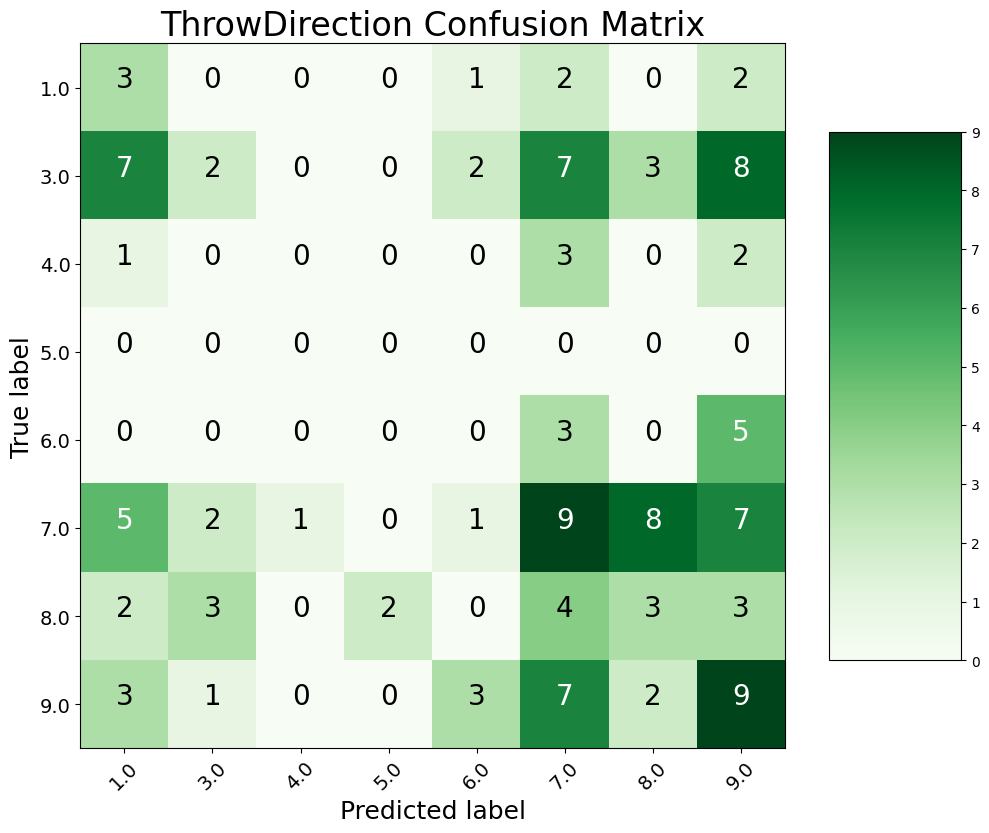

In [18]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                fontsize = 20,
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(test_labels,predictions)
print(cm)
plot_confusion_matrix(cm, classes = test_classes,
                      title = 'ThrowDirection Confusion Matrix')

In [19]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(test_labels, predictions)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test_labels, predictions)))


#It is calculated by considering the total TP, total FP and total FN of the model. 
#It does not consider each class individually, It calculates the metrics globally.
print('Micro Precision: {:.2f}'.format(precision_score(test_labels, predictions, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(test_labels, predictions, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(test_labels, predictions, average='micro')))


#It calculates metrics for each class individually and then takes unweighted mean of the measures.
print('Macro Precision: {:.2f}'.format(precision_score(test_labels, predictions, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(test_labels, predictions, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(test_labels, predictions, average='macro')))

#Unlike Macro F1, it takes a weighted mean of the measures
print('Weighted Precision: {:.2f}'.format(precision_score(test_labels, predictions, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(test_labels, predictions, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(test_labels, predictions, average='weighted')))




Confusion Matrix

[[3 0 0 0 1 2 0 2]
 [7 2 0 0 2 7 3 8]
 [1 0 0 0 0 3 0 2]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 5]
 [5 2 1 0 1 9 8 7]
 [2 3 0 2 0 4 3 3]
 [3 1 0 0 3 7 2 9]]

Accuracy: 0.21

Micro Precision: 0.21
Micro Recall: 0.21
Micro F1-score: 0.21

Macro Precision: 0.14
Macro Recall: 0.16
Macro F1-score: 0.13

Weighted Precision: 0.21
Weighted Recall: 0.21
Weighted F1-score: 0.19


e:\Master Mechatronics\Projects\handball-data-science\hba-venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Master Mechatronics\Projects\handball-data-science\hba-venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature Importance

In [20]:
print(rf.feature_importances_)
print(f" There are {len(rf.feature_importances_)} features in total")

feature_imp = pd.Series(rf.feature_importances_*100,index=X.columns)
feature_imp

[0.45563657 0.0162369  0.03240392 0.00405774 0.02087085 0.00206157
 0.00266639 0.01107566 0.00201549 0.01536304 0.00352726 0.00583119
 0.00288844 0.01784652 0.01878957 0.00116895 0.02260205 0.01350868
 0.02060519 0.00127327 0.00058228 0.0067167  0.00268148 0.01955752
 0.00147416 0.02632891 0.00836554 0.00916436 0.00054445 0.00298336
 0.00430776 0.01278072 0.02321478 0.00936703 0.01168747 0.00204626
 0.00362165 0.01938139 0.01680153 0.         0.04376427 0.02688535
 0.02160691 0.02674302 0.00759739 0.00760575 0.0054545  0.00264808
 0.00565812]
 There are 49 features in total


whistleThrowTime            45.563657
whistleThrowTimeRelevant     1.623690
goalKeeperPosition           3.240392
name_BCT                     0.405774
name_BERD                    2.087085
name_BHD                     0.206157
name_BRB                     0.266639
name_BRN                     1.107566
name_CDS                     0.201549
name_FHLC                    1.536304
name_GKAS                    0.352726
name_GSU                     0.583119
name_HRL                     0.288844
name_HRS                     1.784652
name_HVM                     1.878957
name_Jusys                   0.116895
name_KDG                     2.260205
name_KLB                     1.350868
name_KTS                     2.060519
name_LJA                     0.127327
name_MBD                     0.058228
name_MCZ                     0.671670
name_MHCN                    0.268148
name_NRL                     1.955752
name_PCH                     0.147416
name_PLC                     2.632891
name_PSV    